In [465]:
import networkx as nx
import igraph
import pandas as pd
import pylab as plt
import numpy as np

In [17]:
print(Bio.__version__)

1.79


# age gene classes из Liebeskind

Скачать [age gene classes](https://github.com/marcottelab/Gene-Ages) из Liebeskind et. al. 2016, и замапить их на наши сети.

In [92]:
yeast_data = pd.read_csv('../data/yeast.txt', sep='\t')
print(yeast_data.shape)

yeast_graph = nx.from_pandas_edgelist(yeast_data, source='Tf', target='Tg', create_using=nx.DiGraph())

print('# of edges: {}'.format(yeast_graph.number_of_edges()))
print('# of nodes: {}'.format(yeast_graph.number_of_nodes()))

(12873, 2)
# of edges: 12873
# of nodes: 4441


In [93]:
mouse_data = pd.read_csv('../data/trrust_rawdata.mouse.tsv', 
                         sep='\t', header=None, 
                         names=['TF', 'Target', 'Mode', 'PMID'])
print(mouse_data.shape)

mouse_graph = nx.from_pandas_edgelist(mouse_data, 'TF', 'Target', ['Mode', 'PMID'], create_using=nx.DiGraph())
print('# of edges: {}'.format(mouse_graph.number_of_edges()))
print('# of nodes: {}'.format(mouse_graph.number_of_nodes()))

(7057, 4)
# of edges: 6490
# of nodes: 2456


In [94]:
human_data = pd.read_csv('../data/trrust_rawdata.human.tsv', 
                         sep='\t', header=None, 
                         names=['TF', 'Target', 'Mode', 'PMID'])
print(human_data.shape)

human_graph = nx.from_pandas_edgelist(human_data, 'TF', 'Target', ['Mode', 'PMID'], create_using=nx.DiGraph())

print('# of edges: {}'.format(human_graph.number_of_edges()))
print('# of nodes: {}'.format(human_graph.number_of_nodes()))

(9396, 4)
# of edges: 8427
# of nodes: 2862


# Для начала можно просто посчитать количество пар TF-TG для каждого класса, нормированное на общее количество линков.



## Import classes from [Gene-Ages/Main/](https://github.com/marcottelab/Gene-Ages/tree/master/Main)

### Yeast

In [95]:
yeast_classes = pd.read_csv('../data/main_YEAST.csv')
print(yeast_classes.shape)
yeast_classes = yeast_classes.rename(columns={"Unnamed: 0": "Protein"})
yeast_classes.head()

(5000, 16)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Dikarya,Ascomycota,Saccharomyceta,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag
0,A2P2R3,0.800,0.0,0.2,0.000000,0.0,0.000000,0.0,0.000000,Cellular_organisms,5,1,0.500402,0.0,0.000000,False
1,D6VTK4,0.000,0.0,0.0,0.000000,0.0,0.000000,0.9,0.100000,Ascomycota,10,0,0.325083,0.2,0.107143,False
2,D6W196,0.000,0.0,0.0,0.500000,0.0,0.300000,0.0,0.200000,Eukaryota,10,2,1.029653,2.86363636364,2.236866,False
3,O13297,0.000,0.0,0.0,0.272727,0.0,0.454545,0.0,0.272727,Dikarya,11,0,1.067090,2.94545454545,0.120000,False
4,O13516,0.375,0.5,0.0,0.125000,0.0,0.000000,0.0,0.000000,Euk_Archaea,8,1,0.974315,0.777777777778,-0.220779,False


In [96]:
# for uniprot mapping - https://www.uniprot.org/uploadlists/

yeast_ID_UniProt = list(yeast_classes['Protein'])

with open('../data/age_classes/yeast_ID_UniProt.txt', 'w') as f:
    for el in yeast_ID_UniProt:
        f.write(el+' ')

 ... https://www.uniprot.org/uploadlists/ ...

In [97]:
yeast_prot_genes = pd.read_csv('../data/age_classes/Yeast_UniProtMapping.txt',
                                  sep='\t',
                                  engine='python',
                                  names=['Protein', 'Gene'],
                                  header=1)
yeast_prot_genes.head()

,Protein,Gene
0,D6VTK4,STE2
1,D6W196,SAL1
2,O13297,CET1
3,O13516,RPS9A
4,O13525,COQ4


In [99]:
yeast_classes = yeast_classes.merge(yeast_prot_genes, how='outer', on=['Protein'])
yeast_classes.head()

,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Dikarya,Ascomycota,Saccharomyceta,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
0,A2P2R3,0.800,0.0,0.2,0.000000,0.0,0.000000,0.0,0.000000,Cellular_organisms,5,1,0.500402,0.0,0.000000,False,NaN
1,D6VTK4,0.000,0.0,0.0,0.000000,0.0,0.000000,0.9,0.100000,Ascomycota,10,0,0.325083,0.2,0.107143,False,STE2
2,D6W196,0.000,0.0,0.0,0.500000,0.0,0.300000,0.0,0.200000,Eukaryota,10,2,1.029653,2.86363636364,2.236866,False,SAL1
3,O13297,0.000,0.0,0.0,0.272727,0.0,0.454545,0.0,0.272727,Dikarya,11,0,1.067090,2.94545454545,0.120000,False,CET1
4,O13516,0.375,0.5,0.0,0.125000,0.0,0.000000,0.0,0.000000,Euk_Archaea,8,1,0.974315,0.777777777778,-0.220779,False,RPS9A


In [155]:
yeast_classes.shape

(5005, 17)

In [100]:
yest_TFTG = set(list(yeast_data.Tf) + list(yeast_data.Tg))

In [120]:
yeast_gene_ages = yeast_classes.query('Gene in @yest_TFTG')
#yeast_gene_ages = yeast_gene_ages[['Gene', 'modeAge']]
print(yeast_gene_ages.shape)
yeast_gene_ages.head()

(236, 17)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Dikarya,Ascomycota,Saccharomyceta,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
318,P0CD98,0.125000,0.000000,0.375000,0.375000,0.125000,0.0,0.0,0.000000,Euk+Bac,8,2,1.255482,2.31111111111,1.380952,False,YLL053C
338,P10356,0.000000,0.076923,0.769231,0.000000,0.153846,0.0,0.0,0.000000,Euk+Bac,13,0,0.687092,1.51282051282,-0.234127,True,YER152C
807,P25351,0.076923,0.000000,0.307692,0.538462,0.000000,0.0,0.0,0.076923,Eukaryota,13,0,1.090599,2.4358974359,-0.067460,False,YCR023C
854,P25565,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.0,0.857143,Saccharomyceta,7,1,0.410116,2.25,0.583333,False,YCL002C
873,P25606,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,0.0,0.000000,Eukaryota,3,1,0.636514,1.16666666667,NaN,False,YCR100C


#### Add New info to Graf:

In [296]:
yeast_attrs = yeast_gene_ages[['Gene', 'modeAge']].set_index('Gene').T.to_dict('dict')
nx.set_node_attributes(yeast_graph, yeast_attrs) 

In [297]:
yeast_gene_ages.groupby('modeAge').count().Gene

modeAge
Ascomycota             8
Cellular_organisms    16
Dikarya               29
Euk+Bac               50
Euk_Archaea            2
Eukaryota             39
Opisthokonta          11
Saccharomyceta        81
Name: Gene, dtype: int64

In [298]:
selected_nodes = [n for n,v in yeast_graph.nodes(data=True) if v]
selected_edges = [(u, v) for u, v, e in yeast_graph.edges(data=True) if u in selected_nodes or v in selected_nodes]

In [301]:
H = nx.DiGraph(((u, v, e) for u,v,e in yeast_graph.edges(data=True) if u in selected_nodes or v in selected_nodes))
nx.set_node_attributes(H, yeast_attrs)

In [512]:
color_map = []

color_dict = {'Ascomycota': 'tab:blue', 'Cellular_organisms': 'tab:green',
              'Dikarya': 'gold', 'Euk+Bac': 'tab:red',
              'Euk_Archaea': 'tab:pink', 'Eukaryota': 'tab:olive',
              'Opisthokonta': 'tab:cyan', 'Saccharomyceta': 'red'}

for node in H.nodes(data=True):
    
    if node[1].get('modeAge') in color_dict.keys():
        color_map.append(color_dict[node[1].get('modeAge')])
    
    else: 
        color_map.append('ivory')

In [513]:
plt.figure(figsize=(50, 50))
pos = nx.bipartite_layout(H, selected_nodes)
nx.draw_networkx_nodes(H, pos, node_color=color_map)
nx.draw_networkx_edges(H, pos)

#plt.show()
plt.savefig('../data/02_plots/plot_01.png')
plt.close()

In [345]:
plt.figure(figsize=(50, 50))
pos = nx.circular_layout(H)

nx.draw_networkx_nodes(H, pos, node_color=color_map)
nx.draw_networkx_edges(H, pos)

#plt.show()
plt.savefig('../data/02_plots/plot_02.png')
plt.close()

In [424]:
yeast_gene_ages.loc[yeast_gene_ages['Gene'] == 'YER152C']['modeAge'].iloc[0]

'Euk+Bac'

In [428]:
tf_ages_list = []
tg_ages_list = []

for i in yeast_data.Tf:
    if list(yeast_gene_ages.loc[yeast_gene_ages['Gene'] == i]['modeAge']):
        tf_ages_list.append(yeast_gene_ages.loc[yeast_gene_ages['Gene'] == i]['modeAge'].iloc[0])
        
    else:
        tf_ages_list.append(None)

for i in yeast_data.Tg:
    if list(yeast_gene_ages.loc[yeast_gene_ages['Gene'] == i]['modeAge']):
        tg_ages_list.append(yeast_gene_ages.loc[yeast_gene_ages['Gene'] == i]['modeAge'].iloc[0])
    else:
        tg_ages_list.append(None)

In [432]:
yeast_data['TF_age'] = tf_ages_list
yeast_data['Tg_age'] = tg_ages_list

In [478]:
yeast_data['TF_age'].replace('None', np.nan, inplace=True)
yeast_data['Tg_age'].replace('None', np.nan, inplace=True)

In [489]:
# сохраним датафрейм
yeast_data.to_csv('../data/yeast_classes.csv')

In [479]:
# Есть ребра, где классы нод не совпадают
yeast_data[yeast_data['TF_age'].notnull() & yeast_data['Tg_age'].notnull()]

,Tf,Tg,TF_age,Tg_age
6836,YJL206C,YHL008C,Dikarya,Euk+Bac
6847,YJL206C,YNR071C,Dikarya,Euk+Bac
6851,YJL206C,YOR389W,Dikarya,Saccharomyceta
6857,YJL206C,YPL277C,Dikarya,Saccharomyceta
6858,YJL206C,YPL278C,Dikarya,Saccharomyceta


In [497]:
yeast_data['age'] = yeast_data["TF_age"].fillna('') + yeast_data["Tg_age"].fillna('')
yeast_data['age'].replace('', np.nan, inplace=True)
yeast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12873 entries, 0 to 12872
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tf      12873 non-null  object
 1   Tg      12873 non-null  object
 2   TF_age  57 non-null     object
 3   Tg_age  639 non-null    object
 4   age     691 non-null    object
dtypes: object(5)
memory usage: 503.0+ KB


Подсчитаем сколько связей каждого класса:

In [498]:
yeast_data.groupby('age', as_index=False).count()

,age,Tf,Tg,TF_age,Tg_age
0,Ascomycota,18,18,0,18
1,Cellular_organisms,63,63,0,63
2,Dikarya,114,114,35,79
3,DikaryaEuk+Bac,2,2,2,2
4,DikaryaSaccharomyceta,3,3,3,3
5,Euk+Bac,109,109,0,109
6,Euk_Archaea,9,9,0,9
7,Eukaryota,73,73,0,73
8,Opisthokonta,37,37,13,24
9,Saccharomyceta,263,263,4,259


In [504]:
yeast_data[['age']].value_counts()

age                  
Saccharomyceta           263
Dikarya                  114
Euk+Bac                  109
Eukaryota                 73
Cellular_organisms        63
Opisthokonta              37
Ascomycota                18
Euk_Archaea                9
DikaryaSaccharomyceta      3
DikaryaEuk+Bac             2
dtype: int64

In [506]:
# Доля классов с учетом всех связей
yeast_data[['age']].value_counts(normalize=True, dropna=False)

age                  
NaN                      0.946322
Saccharomyceta           0.020430
Dikarya                  0.008856
Euk+Bac                  0.008467
Eukaryota                0.005671
Cellular_organisms       0.004894
Opisthokonta             0.002874
Ascomycota               0.001398
Euk_Archaea              0.000699
DikaryaSaccharomyceta    0.000233
DikaryaEuk+Bac           0.000155
dtype: float64

In [507]:
# Доля классов среди исзвестных классов
yeast_data[['age']].value_counts(normalize=True)

age                  
Saccharomyceta           0.380608
Dikarya                  0.164978
Euk+Bac                  0.157742
Eukaryota                0.105644
Cellular_organisms       0.091172
Opisthokonta             0.053546
Ascomycota               0.026049
Euk_Archaea              0.013025
DikaryaSaccharomyceta    0.004342
DikaryaEuk+Bac           0.002894
dtype: float64

<AxesSubplot:ylabel='age'>

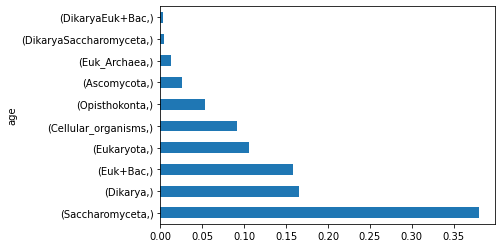

In [511]:
yeast_data[['age']].value_counts(normalize=True).plot.barh()

### Mouse

In [109]:
mouse_classes = pd.read_csv('../data/main_MOUSE.csv')
print(mouse_classes.shape)
mouse_classes = mouse_classes.rename(columns={"Unnamed: 0": "Protein"})
mouse_classes.head()

(19950, 16)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag
0,A0A0A0MQ97,0.000000,0.000000,0.000000,0.0,0.0,0.375000,0.625000,0.000000,Vertebrata,8,5,0.661563,3.33333333333,1.599206,False
1,A0A0A0MQB3,0.333333,0.083333,0.333333,0.0,0.0,0.250000,0.000000,0.000000,Cellular_organisms,12,0,1.286057,3.24242424242,-0.166667,True
2,A0A0A0MQC1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.800000,0.200000,Vertebrata,5,1,0.500402,1.0,NaN,False
3,A0A0A0MQF7,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,Eumetazoa,2,0,-0.000000,2.0,NaN,False
4,A0A0B4J1F6,0.000000,0.000000,0.000000,0.0,0.0,0.142857,0.428571,0.428571,Mammalia,7,5,1.004242,4.16666666667,4.400000,False


In [110]:
mouse_TFTG = set(list(mouse_data.TF) + list(mouse_data.Target))

In [111]:
# for uniprot mapping - https://www.uniprot.org/uploadlists/

mouse_ID_UniProt = list(mouse_classes['Protein'])

with open('../data/age_classes/mouse_ID_UniProt.txt', 'w') as f:
    for el in mouse_ID_UniProt:
        f.write(el+' ')

 ... https://www.uniprot.org/uploadlists/ ...

In [112]:
mouse_prot_genes = pd.read_csv('../data/age_classes/mouse_UniProtMapping.txt',
                                  sep='\t',
                                  engine='python',
                                  names=['Protein', 'Gene'],
                                  header=1)
mouse_prot_genes.head()

,Protein,Gene
0,A0A0A0MQC1,Ighv3-5
1,A0A0A0MQF7,1700025G04Rik
2,A0A0B4J1F6,BC053393
3,A0A0B4J1F8,Smim10l2a
4,A0A0B4J1F9,Tchh


In [113]:
mouse_classes = mouse_classes.merge(mouse_prot_genes, how='outer', on=['Protein'])
mouse_classes.head()

,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
0,A0A0A0MQ97,0.000000,0.000000,0.000000,0.0,0.0,0.375000,0.625000,0.000000,Vertebrata,8,5,0.661563,3.33333333333,1.599206,False,NaN
1,A0A0A0MQB3,0.333333,0.083333,0.333333,0.0,0.0,0.250000,0.000000,0.000000,Cellular_organisms,12,0,1.286057,3.24242424242,-0.166667,True,NaN
2,A0A0A0MQC1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.800000,0.200000,Vertebrata,5,1,0.500402,1.0,NaN,False,Ighv3-5
3,A0A0A0MQF7,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,Eumetazoa,2,0,-0.000000,2.0,NaN,False,1700025G04Rik
4,A0A0B4J1F6,0.000000,0.000000,0.000000,0.0,0.0,0.142857,0.428571,0.428571,Mammalia,7,5,1.004242,4.16666666667,4.400000,False,BC053393


In [116]:
mouse_classes.shape

(20001, 17)

In [117]:
mouse_gene_ages = mouse_classes.query('Gene in @mouse_TFTG')
#mouse_gene_ages = mouse_gene_ages[['Gene', 'modeAge']]
print(mouse_gene_ages.shape)
mouse_gene_ages.head()

(2287, 17)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
44,A1L358,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,Opisthokonta,1,11,-0.000000,5.98484848485,3.577778,False,Mzf1
80,A2A5Z6,0.0,0.0,0.0,0.714286,0.0,0.142857,0.142857,0.000000,Eukaryota,7,5,0.796312,4.10606060606,4.533333,False,Smurf2
87,A2A6M5,0.0,0.0,0.0,0.090909,0.0,0.272727,0.363636,0.272727,Vertebrata,11,1,1.294545,5.37878787879,2.711111,False,Calcoco2
97,A2A7F4,0.0,0.0,0.0,0.000000,0.0,0.384615,0.615385,0.000000,Vertebrata,13,0,0.666278,1.02564102564,0.150794,False,Rlf
114,A2A863,0.0,0.0,0.0,0.000000,0.0,0.583333,0.416667,0.000000,Eumetazoa,12,1,0.679193,2.48717948718,1.988095,False,Itgb4


#### Add New info to Graf:

### Human

In [145]:
human_classes = pd.read_csv('../data/main_HUMAN.csv')
print(human_classes.shape)
human_classes = human_classes.rename(columns={"Unnamed: 0": "Protein"})
human_classes.head()

(20331, 16)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag
0,A0A075B6G5,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,Eumetazoa,1,1,-0.000000,6.0,NaN,False
1,A0A075B6R3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,Mammalia,2,1,-0.000000,10.6666666667,16.0,False
2,A0A0A0MR89,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,Eumetazoa,1,1,-0.000000,1.0,NaN,False
3,A0A0A0MS98,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.545455,Mammalia,11,1,0.689009,5.68181818182,1.8,False
4,A0A0A0MSJ3,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,Eukaryota,2,0,-0.000000,1.0,NaN,False


In [146]:
human_TFTG = set(list(human_data.TF) + list(human_data.Target))

In [147]:
# for uniprot mapping - https://www.uniprot.org/uploadlists/

human_ID_UniProt = list(human_classes['Protein'])

with open('../data/age_classes/human_ID_UniProt.txt', 'w') as f:
    for el in human_ID_UniProt:
        f.write(el+' ')

 ... https://www.uniprot.org/uploadlists/ ...

In [148]:
human_prot_genes = pd.read_csv('../data/age_classes/human_UniProtMapping.txt',
                                  sep='\t',
                                  engine='python',
                                  names=['Protein', 'Gene'],
                                  header=1)
print(human_prot_genes.shape)
human_prot_genes.head()

(19629, 2)


,Protein,Gene
0,A0A075B6R3,HELZ
1,A0A0A0MR89,NRXN3
2,A0A0A0MS98,SLC4A1
3,A0A0A0MSL8,RBM14-RBM4
4,A0A0A0MTC1,RNF213


In [149]:
human_classes = human_classes.merge(human_prot_genes, how='outer', on=['Protein'])
human_classes.head()

,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
0,A0A075B6G5,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,Eumetazoa,1,1,-0.000000,6.0,NaN,False,NaN
1,A0A075B6R3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,Mammalia,2,1,-0.000000,10.6666666667,16.0,False,HELZ
2,A0A0A0MR89,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,Eumetazoa,1,1,-0.000000,1.0,NaN,False,NRXN3
3,A0A0A0MS98,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.545455,Mammalia,11,1,0.689009,5.68181818182,1.8,False,SLC4A1
4,A0A0A0MSJ3,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,Eukaryota,2,0,-0.000000,1.0,NaN,False,NaN


In [150]:
human_prot_genes = human_classes.query('Gene in @human_TFTG')
#human_prot_genes = human_prot_genes[['Gene', 'modeAge']]
print(human_prot_genes.shape)
human_prot_genes

(2855, 17)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
23,A0AVK6,0.0,0.0,0.000000,0.700000,0.000000,0.000000,0.300000,0.0,Eukaryota,10,3,0.610864,4.51282051282,2.861111,False,E2F8
94,A2AB90,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,Vertebrata,6,1,-0.000000,1.14285714286,4.000000,False,TAPBP
96,A2ADX3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,Vertebrata,4,1,-0.000000,0.0,NaN,False,HLA-DQB2
196,A6H8Y1,0.0,0.0,0.000000,0.666667,0.000000,0.333333,0.000000,0.0,Eukaryota,9,4,0.636514,6.35897435897,0.357143,False,BDP1
501,A6NNB3,0.0,0.0,0.000000,0.000000,0.000000,0.083333,0.916667,0.0,Vertebrata,12,1,0.286836,0.74358974359,0.091270,False,IFITM5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20459,Q9Y6W6,0.0,0.0,0.142857,0.714286,0.000000,0.142857,0.000000,0.0,Eukaryota,7,6,0.796312,3.58974358974,0.992063,False,DUSP10
20461,Q9Y6X0,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.833333,0.0,Vertebrata,12,1,0.450561,3.23076923077,0.738095,False,SETBP1
20463,Q9Y6X2,0.0,0.0,0.000000,0.583333,0.083333,0.000000,0.333333,0.0,Eukaryota,12,1,0.887694,4.64102564103,3.511905,False,PIAS3
20468,Q9Y6X8,0.0,0.0,0.000000,0.000000,0.000000,0.636364,0.363636,0.0,Eumetazoa,11,2,0.655482,1.07692307692,2.000000,False,ZHX2


#### Add New info to Graf:

## Более продвинутые идеи (например посмотреть коррелирует ли node degree с age class) уже тоже можно пробовать.